In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Load the dataset
data = pd.read_csv('final_clean_data.csv')

**Note: To get more insight about the data**

In [ ]:
print(data.head())

  Company_Name Dependent.Company.Status  Number.of.Co.founders  \
0     COMPANY1                  SUCCESS                      1   
1     COMPANY2                  SUCCESS                      2   
2     COMPANY3                  SUCCESS                      3   
3     COMPANY4                  SUCCESS                      2   
4     COMPANY5                  SUCCESS                      1   

   Number.of.of.advisors  Team.size.Senior.leadership  \
0                      2                            2   
1                      0                            4   
2                      0                            7   
3                      0                            4   
4                      1                            8   

   Number.of.of.repeat.investors  \
0                              4   
1                              0   
2                              0   
3                              0   
4                              0   

  Average.size.of.companies.worked.for.in.t

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 15 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Company_Name                                      439 non-null    object
 1   Dependent.Company.Status                          439 non-null    object
 2   Number.of.Co.founders                             439 non-null    int64 
 3   Number.of.of.advisors                             439 non-null    int64 
 4   Team.size.Senior.leadership                       439 non-null    int64 
 5   Number.of.of.repeat.investors                     439 non-null    int64 
 6   Average.size.of.companies.worked.for.in.the.past  439 non-null    object
 7   Product.or.service.company.                       439 non-null    object
 8   Focus.on.private.or.public.data.                  439 non-null    object
 9   Cloud.or.platform.based.serive.p

In [ ]:
data.shape

(439, 15)

**Step2: Data Processing**

In [ ]:
# Check for any missing values
print(data.isnull().sum())

Company_Name                                        0
Dependent.Company.Status                            0
Number.of.Co.founders                               0
Number.of.of.advisors                               0
Team.size.Senior.leadership                         0
Number.of.of.repeat.investors                       0
Average.size.of.companies.worked.for.in.the.past    0
Product.or.service.company.                         0
Focus.on.private.or.public.data.                    0
Cloud.or.platform.based.serive.product.             0
Local.or.global.player                              0
Worked.in.top.companies                             0
Focus.on.consumer.data.                             0
Crowdfunding.based.business                         0
Machine.Learning.based.business                     0
dtype: int64


In [ ]:
# Explore data statistics and correlations
print(data.describe())

       Number.of.Co.founders  Number.of.of.advisors  \
count             439.000000             439.000000   
mean                1.927107               1.061503   
std                 1.118205               2.026840   
min                 0.000000               0.000000   
25%                 1.000000               0.000000   
50%                 2.000000               0.000000   
75%                 3.000000               1.000000   
max                 7.000000              13.000000   

       Team.size.Senior.leadership  Number.of.of.repeat.investors  
count                   439.000000                     439.000000  
mean                      3.785877                       0.594533  
std                       2.513830                       1.210520  
min                       1.000000                       0.000000  
25%                       2.000000                       0.000000  
50%                       3.000000                       0.000000  
75%                       5.

**One Hot Encoding **

In [1]:
# Drop the 'Company_Name' column
data = data.drop('Company_Name', axis=1)

NameError: name 'data' is not defined

In [ ]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['Average.size.of.companies.worked.for.in.the.past', 'Product.or.service.company.', 'Focus.on.private.or.public.data.',
                       'Cloud.or.platform.based.serive.product.', 'Local.or.global.player', 'Worked.in.top.companies',
                       'Focus.on.consumer.data.', 'Crowdfunding.based.business', 'Machine.Learning.based.business']

In [ ]:
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

In [ ]:
data.head()

,Dependent.Company.Status,Number.of.Co.founders,Number.of.of.advisors,Team.size.Senior.leadership,Number.of.of.repeat.investors,Average.size.of.companies.worked.for.in.the.past,Product.or.service.company.,Focus.on.private.or.public.data.,Cloud.or.platform.based.serive.product.,Local.or.global.player,Worked.in.top.companies,Focus.on.consumer.data.,Crowdfunding.based.business,Machine.Learning.based.business
0,SUCCESS,1,2,2,4,2,2,2,3,0,0,0,0,0
1,SUCCESS,2,0,4,0,0,1,3,3,1,1,1,0,1
2,SUCCESS,3,0,7,0,1,0,2,1,1,1,1,0,0
3,SUCCESS,2,0,4,0,0,1,3,3,1,0,1,0,0
4,SUCCESS,1,1,8,0,2,1,3,3,1,0,1,0,0


**DATA VISUALIZTION**

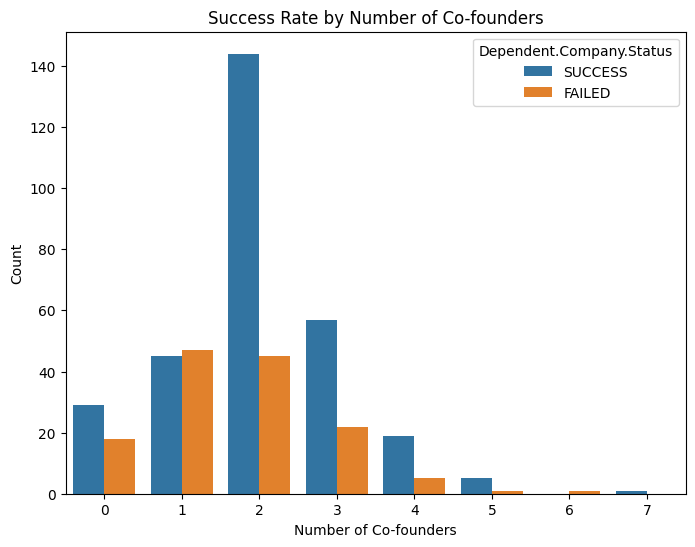

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Number.of.Co.founders', hue='Dependent.Company.Status', data=data)
plt.title('Success Rate by Number of Co-founders')
plt.xlabel('Number of Co-founders')
plt.ylabel('Count')
plt.show()

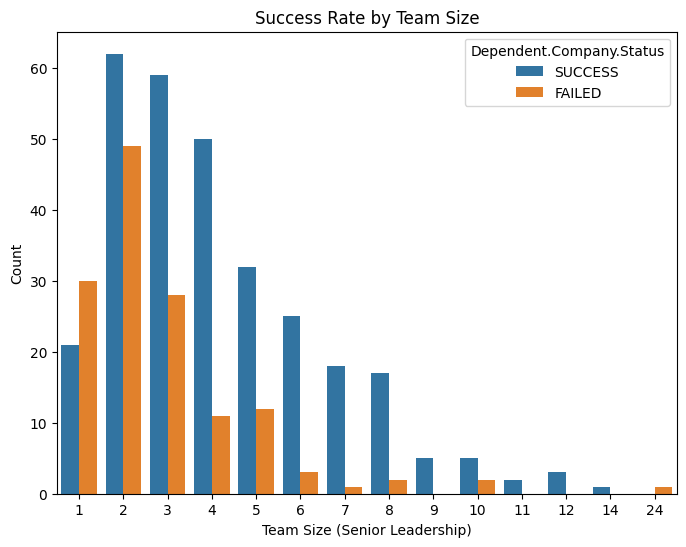

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Team.size.Senior.leadership', hue='Dependent.Company.Status', data=data)
plt.title('Success Rate by Team Size')
plt.xlabel('Team Size (Senior Leadership)')
plt.ylabel('Count')
plt.show()

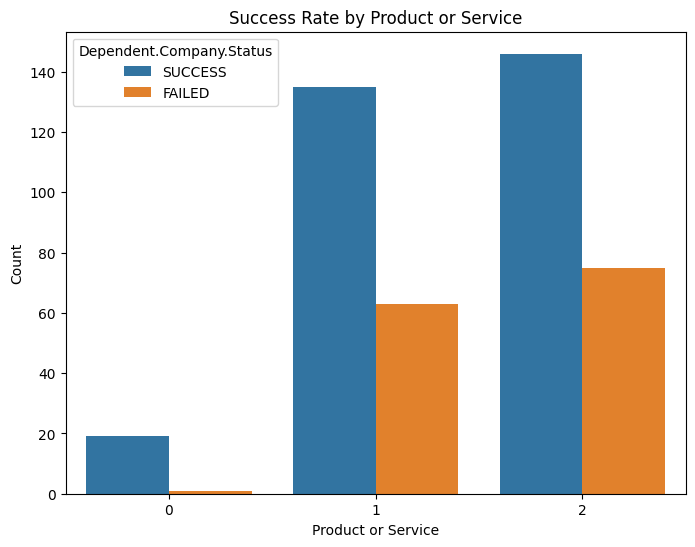

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Product.or.service.company.', hue='Dependent.Company.Status', data=data)
plt.title('Success Rate by Product or Service')
plt.xlabel('Product or Service')
plt.ylabel('Count')
plt.show()


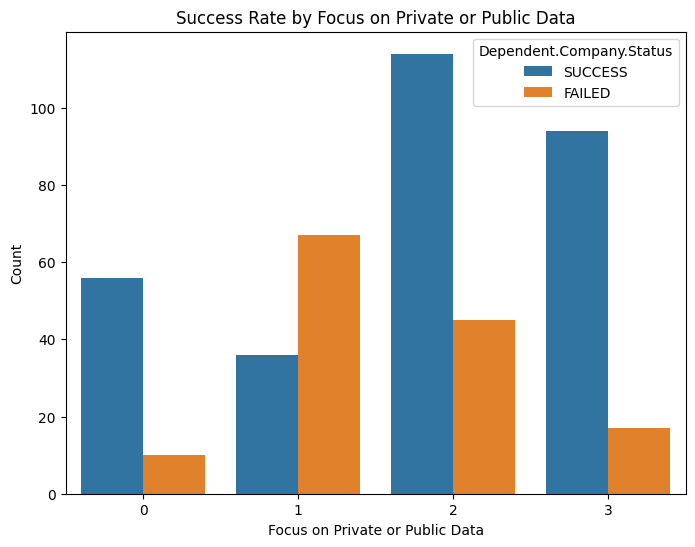

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Focus.on.private.or.public.data.', hue='Dependent.Company.Status', data=data)
plt.title('Success Rate by Focus on Private or Public Data')
plt.xlabel('Focus on Private or Public Data')
plt.ylabel('Count')
plt.show()

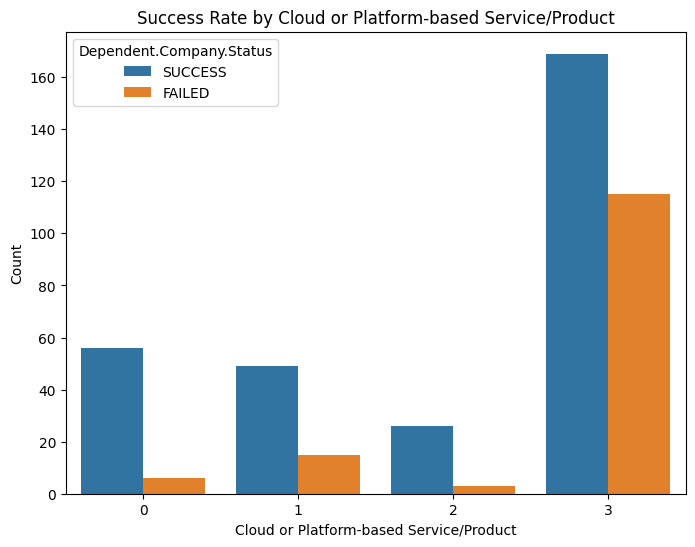

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cloud.or.platform.based.serive.product.', hue='Dependent.Company.Status', data=data)
plt.title('Success Rate by Cloud or Platform-based Service/Product')
plt.xlabel('Cloud or Platform-based Service/Product')
plt.ylabel('Count')
plt.show()


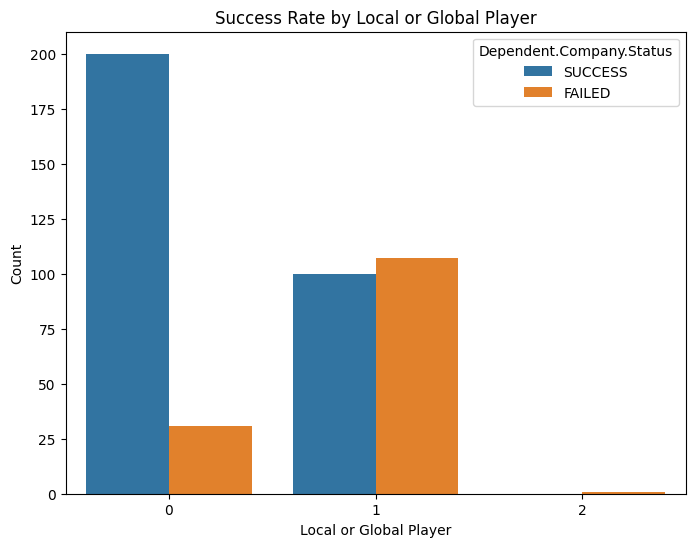

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Local.or.global.player', hue='Dependent.Company.Status', data=data)
plt.title('Success Rate by Local or Global Player')
plt.xlabel('Local or Global Player')
plt.ylabel('Count')
plt.show()


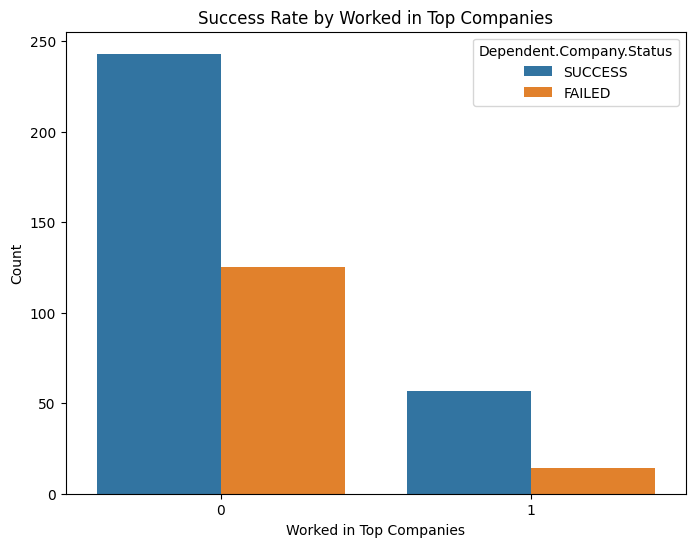

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Worked.in.top.companies', hue='Dependent.Company.Status', data=data)
plt.title('Success Rate by Worked in Top Companies')
plt.xlabel('Worked in Top Companies')
plt.ylabel('Count')
plt.show()


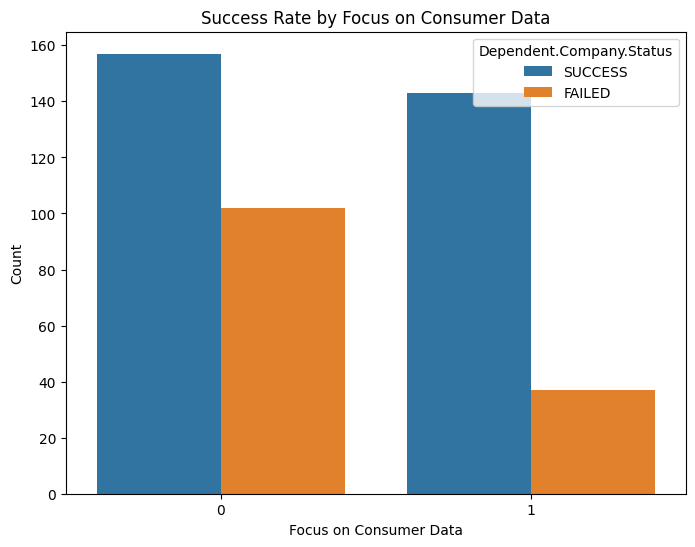

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Focus.on.consumer.data.', hue='Dependent.Company.Status', data=data)
plt.title('Success Rate by Focus on Consumer Data')
plt.xlabel('Focus on Consumer Data')
plt.ylabel('Count')
plt.show()


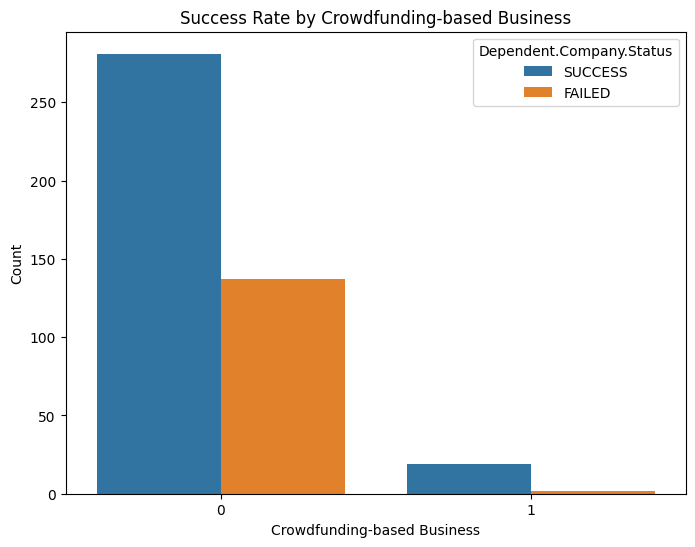

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Crowdfunding.based.business', hue='Dependent.Company.Status', data=data)
plt.title('Success Rate by Crowdfunding-based Business')
plt.xlabel('Crowdfunding-based Business')
plt.ylabel('Count')
plt.show()

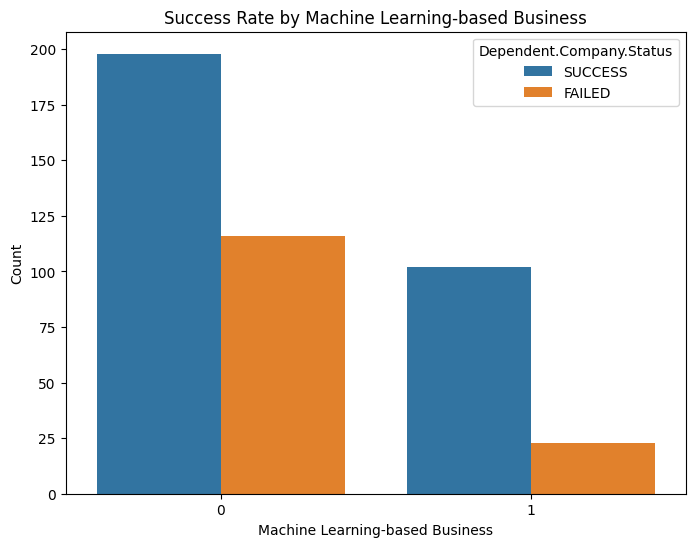

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Machine.Learning.based.business', hue='Dependent.Company.Status', data=data)
plt.title('Success Rate by Machine Learning-based Business')
plt.xlabel('Machine Learning-based Business')
plt.ylabel('Count')
plt.show()

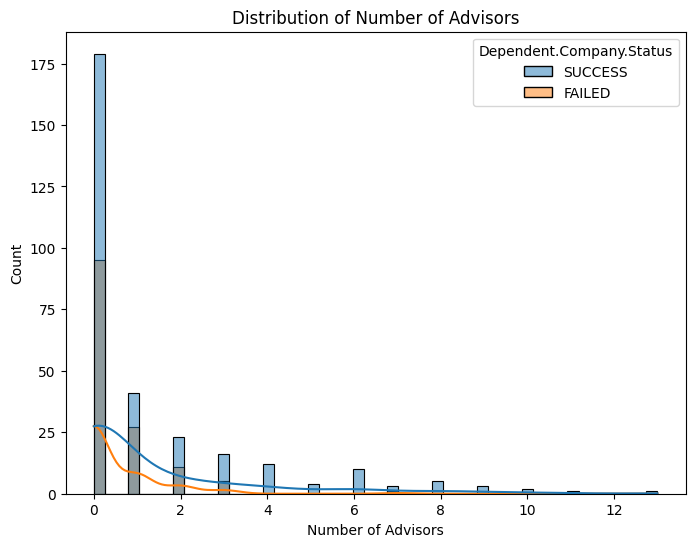

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Number.of.of.advisors', hue='Dependent.Company.Status', kde=True)
plt.title('Distribution of Number of Advisors')
plt.xlabel('Number of Advisors')
plt.ylabel('Count')
plt.show()

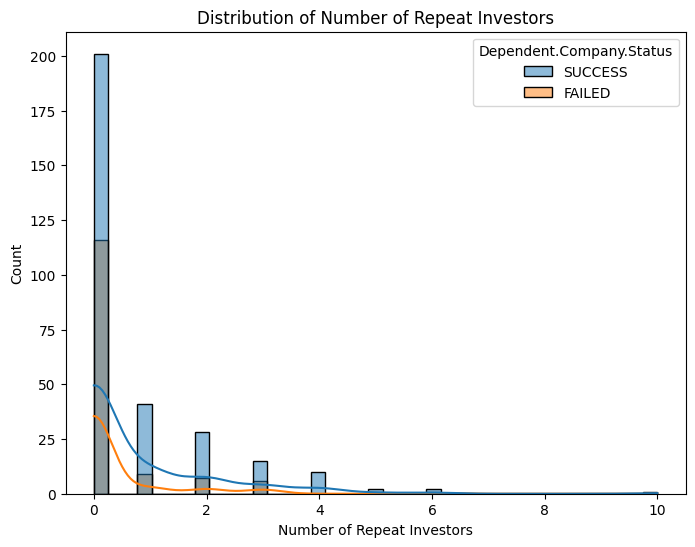

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Number.of.of.repeat.investors', hue='Dependent.Company.Status', kde=True)
plt.title('Distribution of Number of Repeat Investors')
plt.xlabel('Number of Repeat Investors')
plt.ylabel('Count')
plt.show()

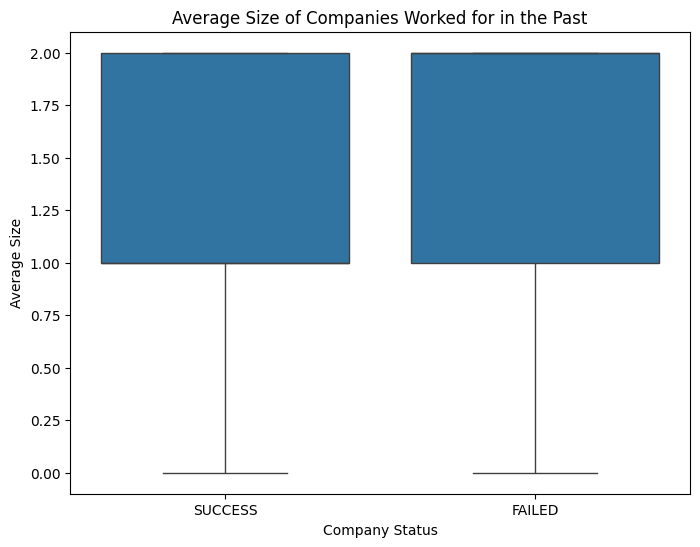

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dependent.Company.Status', y='Average.size.of.companies.worked.for.in.the.past', data=data)
plt.title('Average Size of Companies Worked for in the Past')
plt.xlabel('Company Status')
plt.ylabel('Average Size')
plt.show()

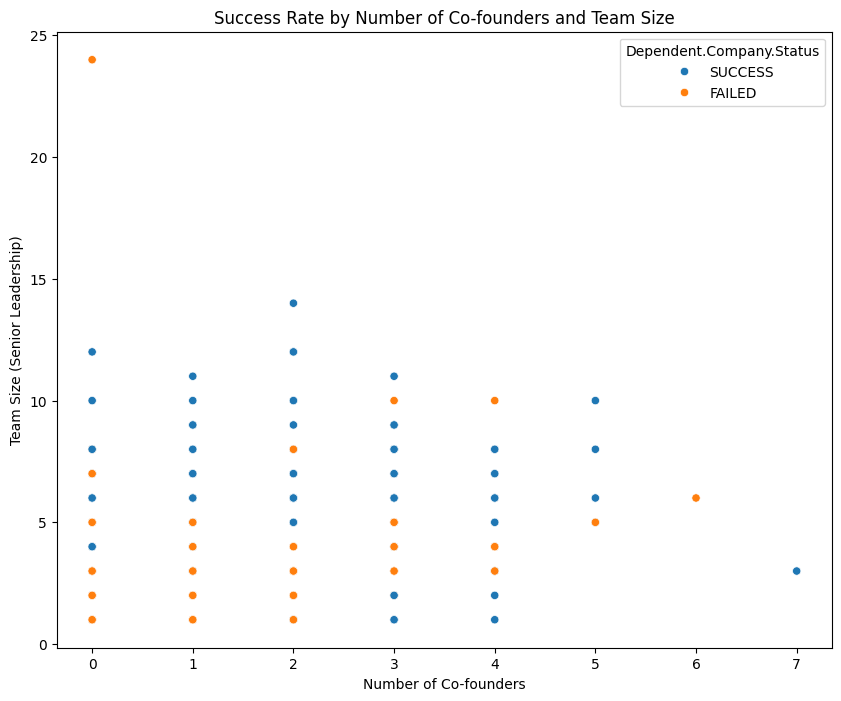

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Number.of.Co.founders', y='Team.size.Senior.leadership', hue='Dependent.Company.Status', data=data)
plt.title('Success Rate by Number of Co-founders and Team Size')
plt.xlabel('Number of Co-founders')
plt.ylabel('Team Size (Senior Leadership)')
plt.show()

**Building the Machine Learning Models **

In [ ]:
# Separate features and target variable
X = data.drop('Dependent.Company.Status', axis=1)
y = data['Dependent.Company.Status']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_encoded)
lin_reg_predictions = lin_reg.predict(X_test_scaled)
lin_reg_accuracy = lin_reg.score(X_test_scaled, y_test_encoded)
print("Linear Regression Accuracy:", lin_reg_accuracy)

Linear Regression Accuracy: 0.3703297038515452


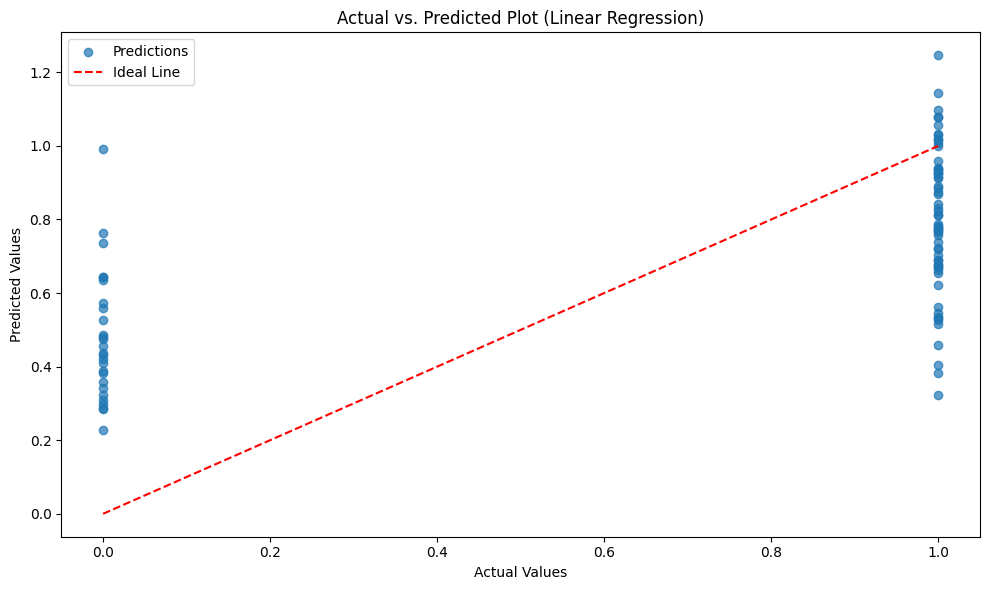

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_encoded)
y_pred_linear = lin_reg.predict(X_test_scaled)
lin_reg_accuracy = lin_reg.score(X_test_scaled, y_test_encoded)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_encoded, y_pred_linear, alpha=0.7, label="Predictions")
plt.plot([y_test_encoded.min(), y_test_encoded.max()], [y_test_encoded.min(), y_test_encoded.max()], 'r--', label="Ideal Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Plot (Linear Regression)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_reg_predictions = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.8181818181818182


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, log_reg_predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[17 10]
 [ 6 55]]


In [ ]:
from sklearn.metrics import roc_auc_score

auc_roc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8785670916818458


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())

Cross-validated Accuracy Scores: [0.71830986 0.72857143 0.75714286 0.77142857 0.74285714]
Mean Cross-validated Accuracy: 0.7436619718309859


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_encoded)
log_reg_predictions = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test_encoded, log_reg_predictions)
print("Logistic Regression Accuracy:", log_reg_accuracy)

precision = precision_score(y_test_encoded, log_reg_predictions)
recall = recall_score(y_test_encoded, log_reg_predictions)
f1 = f1_score(y_test_encoded, log_reg_predictions)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Logistic Regression Accuracy: 0.8181818181818182
Precision: 0.8461538461538461
Recall: 0.9016393442622951
F1-score: 0.873015873015873


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Get the coefficients and odds ratios for each variable
coefficients = model.coef_[0]
odds_ratios = pd.DataFrame({"Variable": X.columns, "Coefficient": coefficients,
                            "Odds Ratio": np.exp(coefficients)})
print(odds_ratios.sort_values(by="Odds Ratio", ascending=False))

                                            Variable  Coefficient  Odds Ratio
10                           Focus.on.consumer.data.     0.378818    1.460557
2                        Team.size.Senior.leadership     0.370268    1.448122
0                              Number.of.Co.founders     0.303850    1.355066
12                   Machine.Learning.based.business     0.236028    1.266210
1                              Number.of.of.advisors     0.118773    1.126114
11                       Crowdfunding.based.business     0.051360    1.052702
6                   Focus.on.private.or.public.data.     0.014891    1.015003
9                            Worked.in.top.companies     0.000972    1.000972
3                      Number.of.of.repeat.investors    -0.022446    0.977804
5                        Product.or.service.company.    -0.230946    0.793782
4   Average.size.of.companies.worked.for.in.the.past    -0.406554    0.665941
7            Cloud.or.platform.based.serive.product.    -0.58099

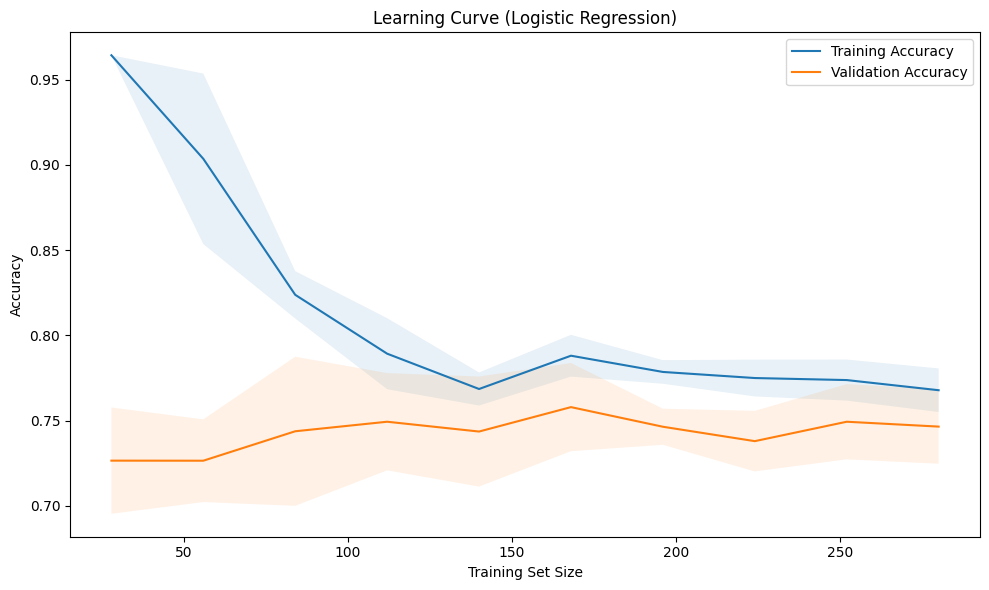

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(log_reg, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Validation Accuracy")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Logistic Regression)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree.predict(X_test_scaled)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print("Decision Tree Accuracy:", decision_tree_accuracy)

Decision Tree Accuracy: 0.6931818181818182


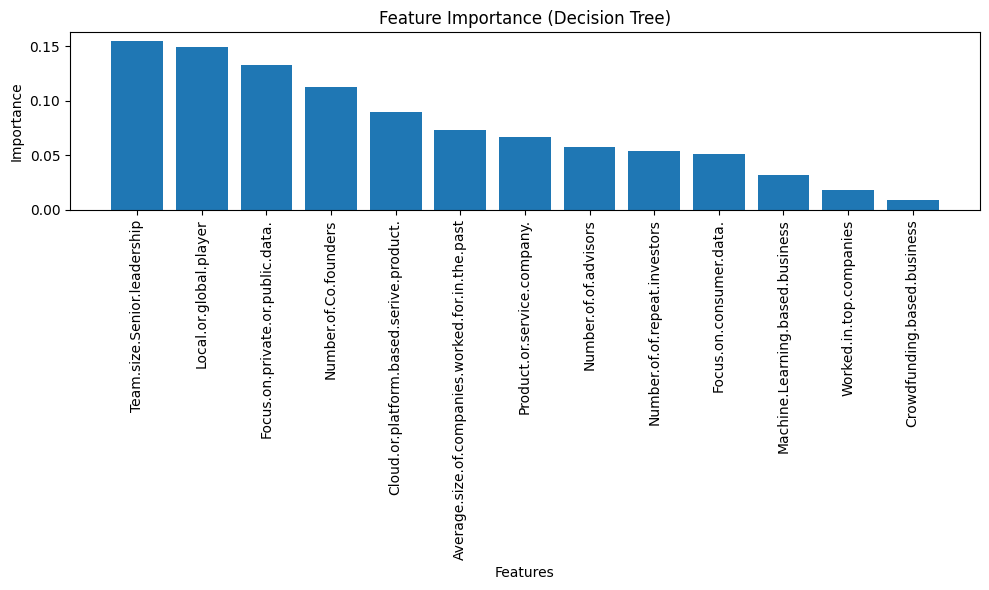

In [ ]:
importances = decision_tree.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance (Decision Tree)")
plt.tight_layout()
plt.show()

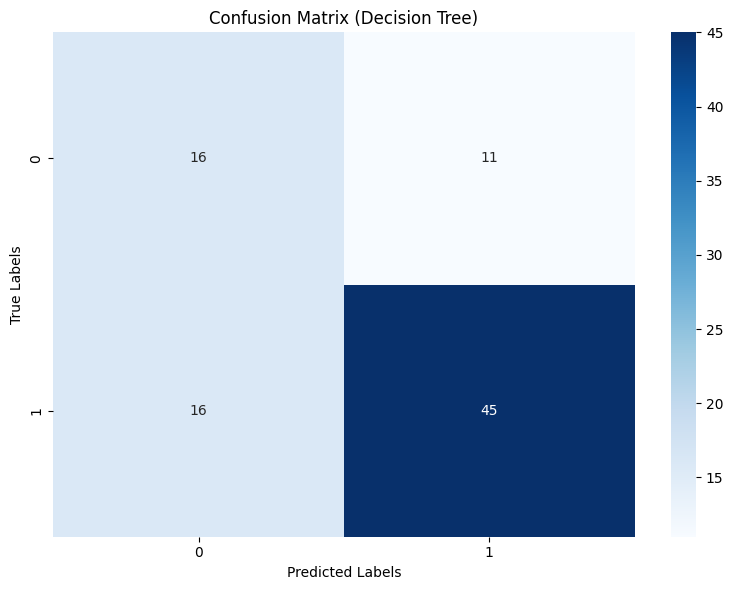

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, decision_tree_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, decision_tree_predictions)
print("Classification Report (Decision Tree):")
print(report)

Classification Report (Decision Tree):
              precision    recall  f1-score   support

      FAILED       0.50      0.59      0.54        27
     SUCCESS       0.80      0.74      0.77        61

    accuracy                           0.69        88
   macro avg       0.65      0.67      0.66        88
weighted avg       0.71      0.69      0.70        88



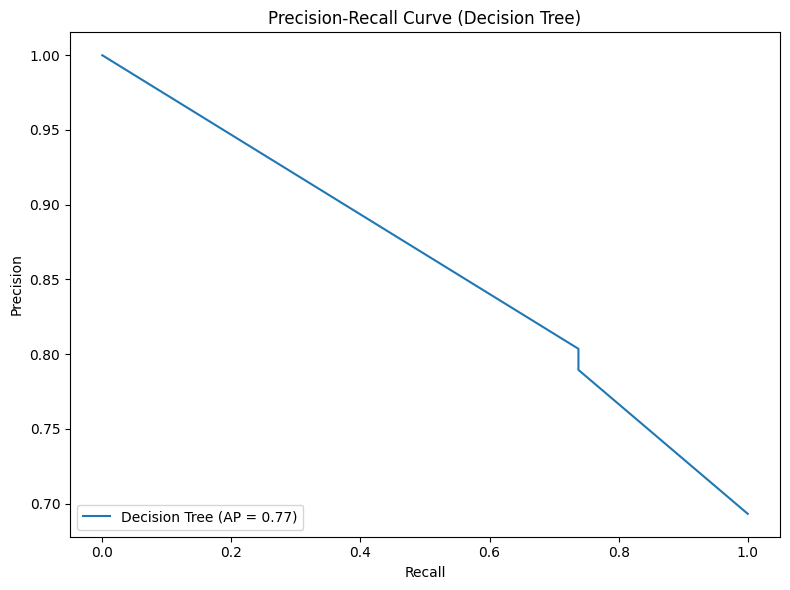

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming y_test and decision_tree are defined earlier in your code
y_test_binary = label_binarize(y_test, classes=['FAILED', 'SUCCESS'])

# Assuming X_test_scaled is defined and scaled appropriately
y_score = decision_tree.predict_proba(X_test_scaled)[:, 1]

# Calculate precision and recall for the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_binary, y_score)
average_precision = average_precision_score(y_test_binary, y_score)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Decision Tree (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

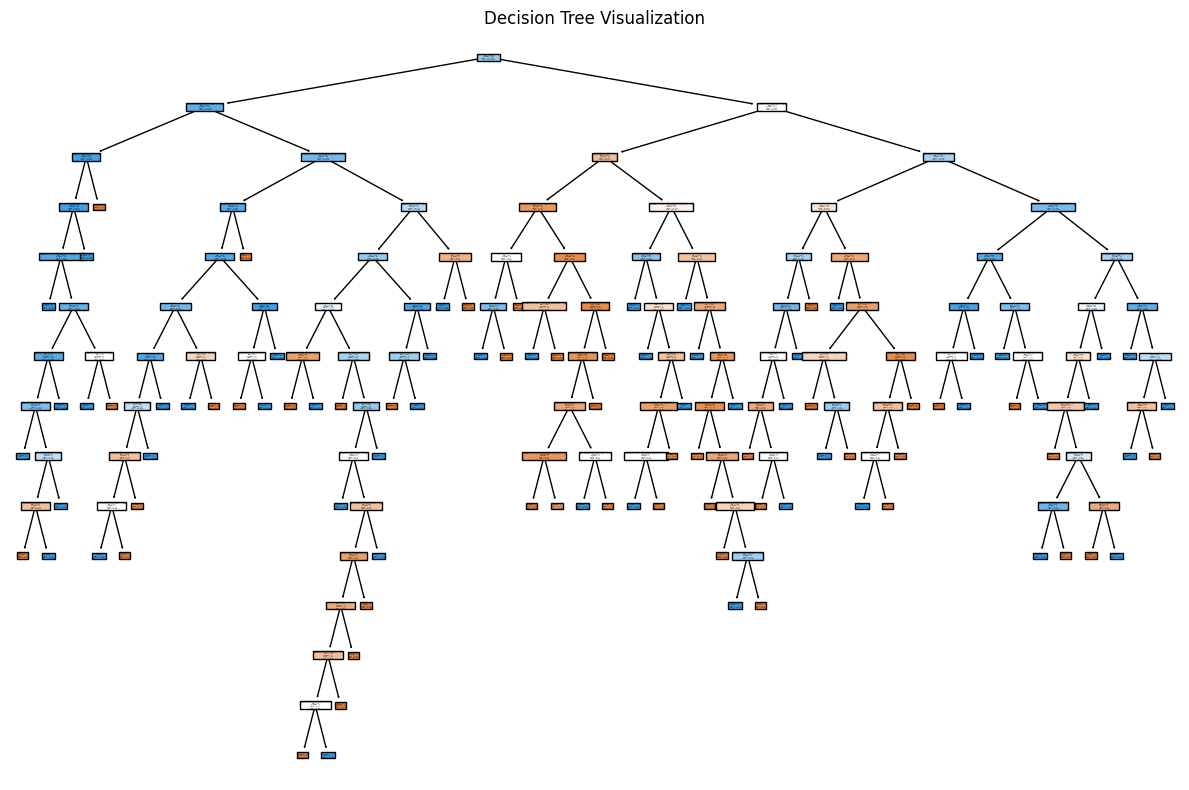

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['FAILED', 'SUCCESS'])
plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.show()

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest.predict(X_test_scaled)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("Random Forest Accuracy:", random_forest_accuracy)

Random Forest Accuracy: 0.8409090909090909


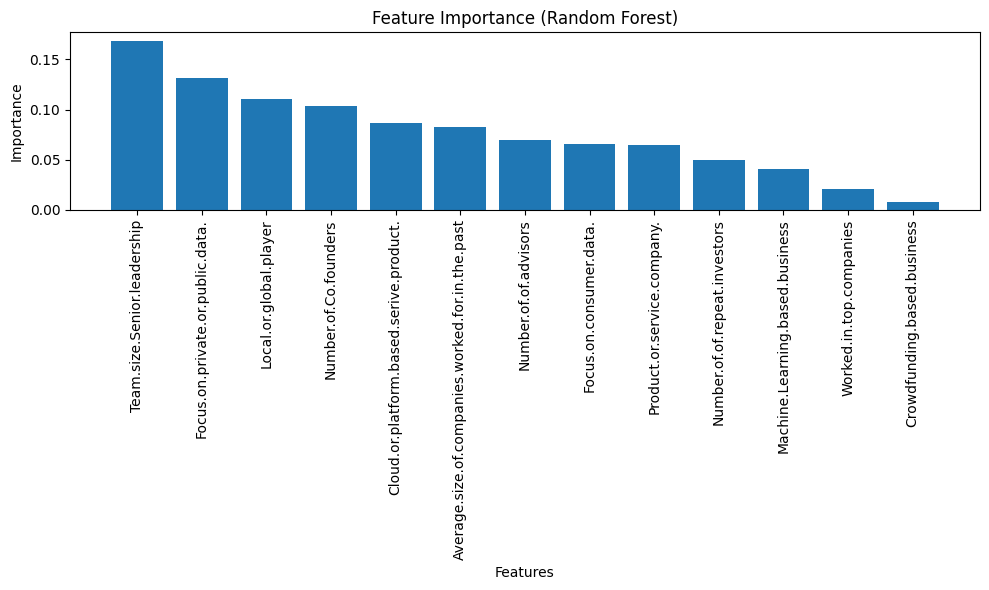

In [ ]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

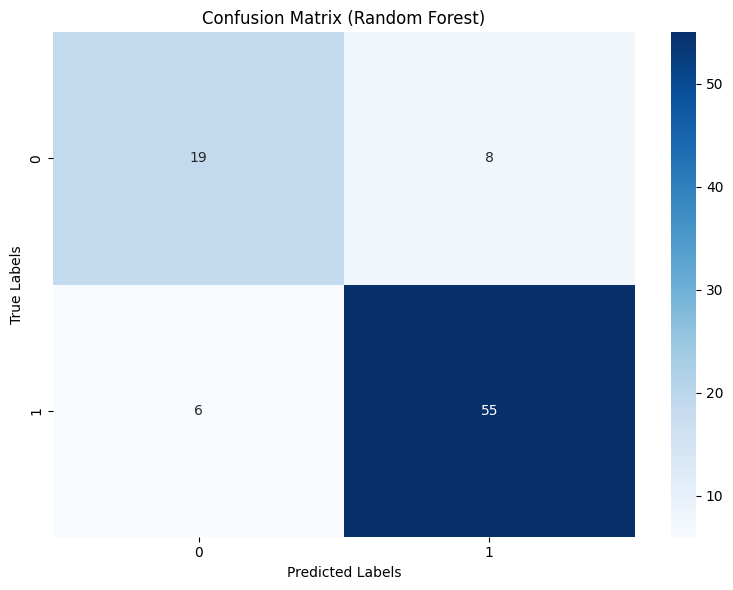

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, random_forest_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, random_forest_predictions)
print("Classification Report (Random Forest):")
print(report)

Classification Report (Random Forest):
              precision    recall  f1-score   support

      FAILED       0.76      0.70      0.73        27
     SUCCESS       0.87      0.90      0.89        61

    accuracy                           0.84        88
   macro avg       0.82      0.80      0.81        88
weighted avg       0.84      0.84      0.84        88



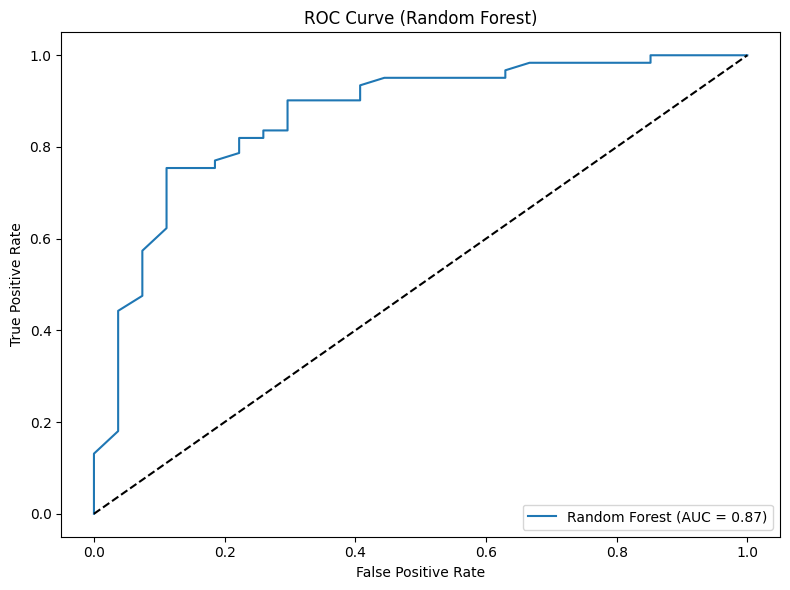

In [ ]:
from sklearn.metrics import roc_curve, auc

y_score = random_forest.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label='SUCCESS')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

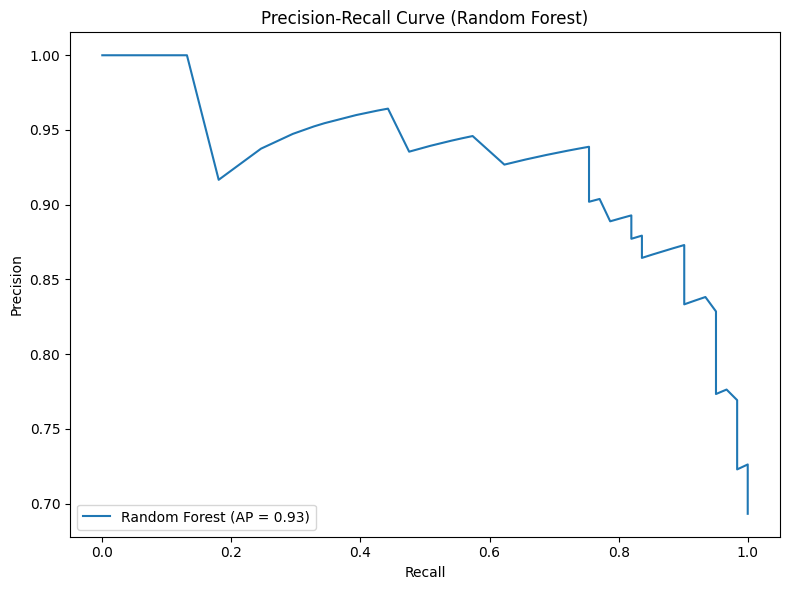

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_score = random_forest.predict_proba(X_test_scaled)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_score, pos_label='SUCCESS')
average_precision = average_precision_score(y_test, y_score, pos_label='SUCCESS')

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Random Forest (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Random Forest)")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

In [ ]:
# Neural Network
neural_network = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
neural_network.fit(X_train_scaled, y_train)
neural_network_predictions = neural_network.predict(X_test_scaled)
neural_network_accuracy = accuracy_score(y_test, neural_network_predictions)
print("Neural Network Accuracy:", neural_network_accuracy)

Neural Network Accuracy: 0.8409090909090909


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


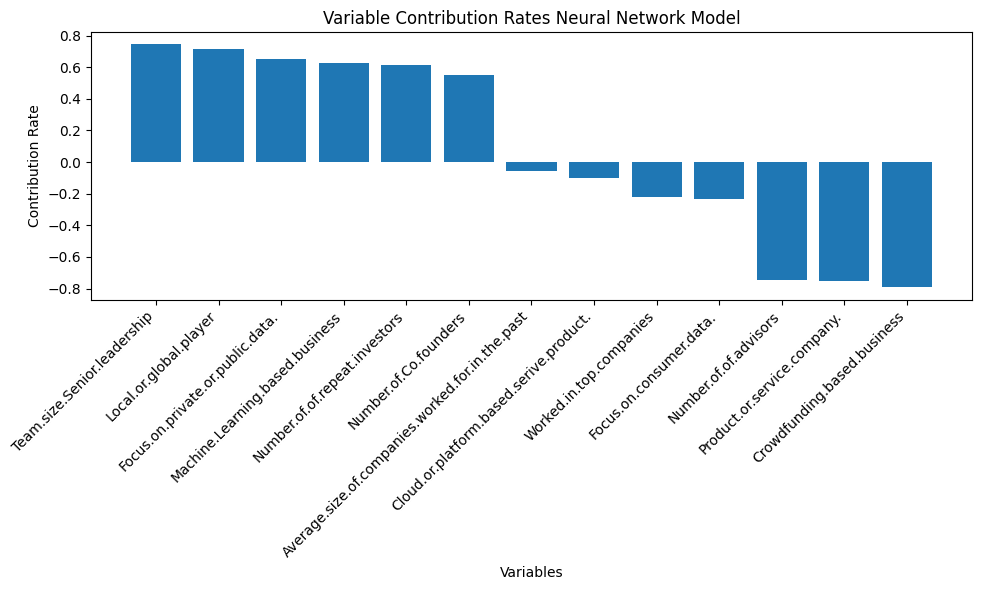

In [ ]:
import matplotlib.pyplot as plt

# Get the feature importances from the neural network model
importances = neural_network.coefs_[0].mean(axis=1)

# Normalize the importances to get the contribution rates
contribution_rates = importances / importances.sum()

# Create a DataFrame with variable names and contribution rates
contribution_df = pd.DataFrame({'Variable': X.columns, 'Contribution Rate': contribution_rates})

# Sort the DataFrame by contribution rates in descending order
contribution_df = contribution_df.sort_values('Contribution Rate', ascending=False)

# Create a bar plot of the contribution rates
plt.figure(figsize=(10, 6))
plt.bar(contribution_df['Variable'], contribution_df['Contribution Rate'])
plt.xlabel('Variables')
plt.ylabel('Contribution Rate')
plt.title('Variable Contribution Rates Neural Network Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
svm_predictions = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)

Support Vector Machine (SVM) Accuracy: 0.8522727272727273


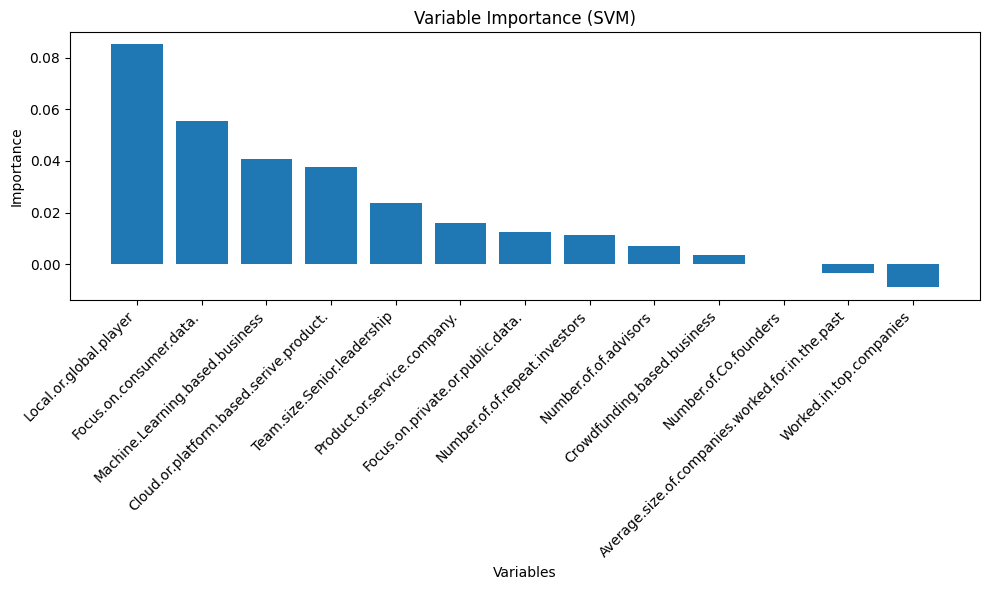

In [ ]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
r = permutation_importance(svm, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Get the feature importances
importances = r.importances_mean

# Create a DataFrame with variable names and importances
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Create a bar plot of the importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Variable Importance (SVM)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the true labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)
kmeans_predictions = kmeans.predict(X_test_scaled)

# Decode the predicted labels
kmeans_predictions_decoded = le.inverse_transform(kmeans_predictions)

# Evaluate the clustering results
kmeans_accuracy = accuracy_score(y_test, kmeans_predictions_decoded)
print("K-Means Clustering Accuracy:", kmeans_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Clustering Accuracy: 0.3068181818181818


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

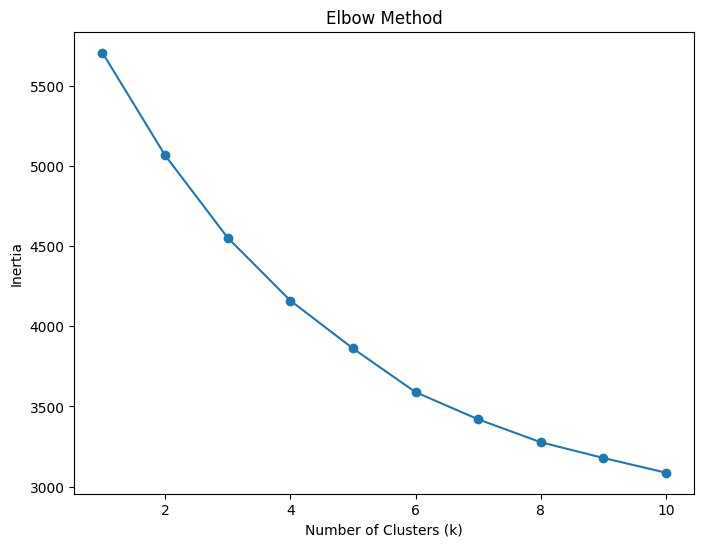

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming you have already separated the features (X) and target variable (y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)  # Adjust the range as needed
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_model.fit(X_train_scaled, y_train_encoded)

# Predict on the test data
gb_predictions = gb_model.predict(X_test_scaled)

# Calculate and print the accuracy
gb_accuracy = accuracy_score(y_test_encoded, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Calculate and print the precision
gb_precision = precision_score(y_test_encoded, gb_predictions)
print("Precision:", gb_precision)

# Calculate and print the recall
gb_recall = recall_score(y_test_encoded, gb_predictions)
print("Recall:", gb_recall)

# Calculate and print the F1-score
gb_f1 = f1_score(y_test_encoded, gb_predictions)
print("F1-score:", gb_f1)


Gradient Boosting Accuracy: 0.8409090909090909
Precision: 0.873015873015873
Recall: 0.9016393442622951
F1-score: 0.8870967741935485


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train_scaled, y_train_encoded)

# Predict on the test data
nb_predictions = nb_model.predict(X_test_scaled)

# Calculate and print the accuracy
nb_accuracy = accuracy_score(y_test_encoded, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

# Calculate and print the precision
nb_precision = precision_score(y_test_encoded, nb_predictions)
print("Precision:", nb_precision)

# Calculate and print the recall
nb_recall = recall_score(y_test_encoded, nb_predictions)
print("Recall:", nb_recall)

# Calculate and print the F1-score
nb_f1 = f1_score(y_test_encoded, nb_predictions)
print("F1-score:", nb_f1)


Naive Bayes Accuracy: 0.75
Precision: 0.8979591836734694
Recall: 0.7213114754098361
F1-score: 0.8


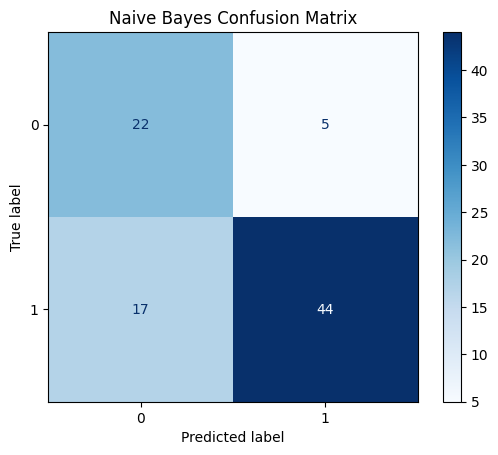

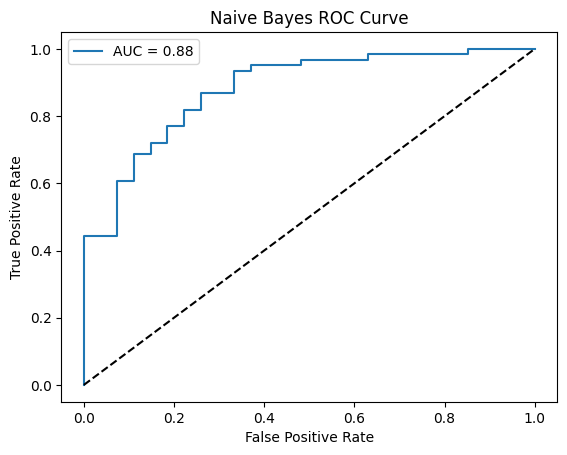

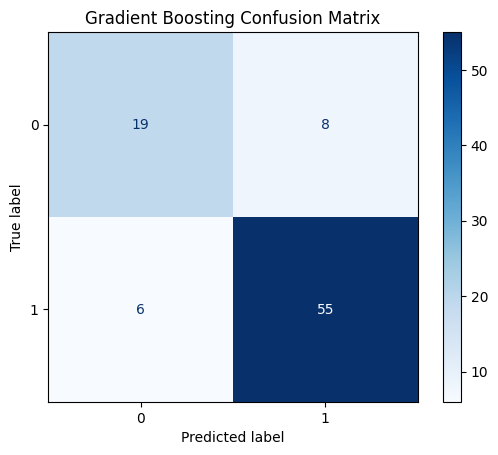

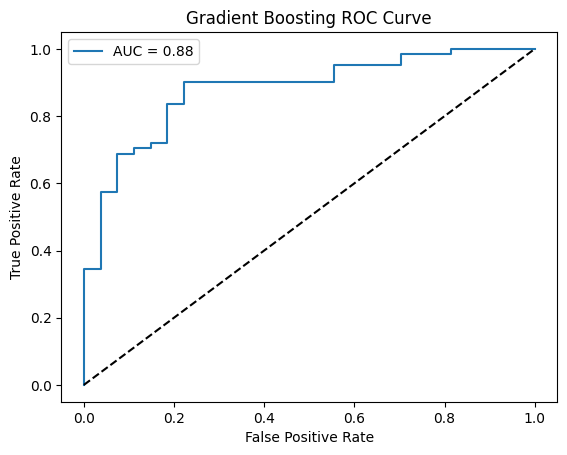

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_encoded)
log_reg_predictions = log_reg.predict(X_test_scaled)

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train_encoded)
nb_predictions = nb_model.predict(X_test_scaled)

# Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train_encoded)
gb_predictions = gb_model.predict(X_test_scaled)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc_score = roc_auc_score(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

# Naive Bayes predictions probabilities
nb_pred_proba = nb_model.predict_proba(X_test_scaled)[:, 1]

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(y_test_encoded, nb_predictions, 'Naive Bayes Confusion Matrix')

# Plot ROC curve for Naive Bayes
plot_roc_curve(y_test_encoded, nb_pred_proba, 'Naive Bayes ROC Curve')

# Gradient Boosting predictions probabilities
gb_pred_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# Plot confusion matrix for Gradient Boosting
plot_confusion_matrix(y_test_encoded, gb_predictions, 'Gradient Boosting Confusion Matrix')

# Plot ROC curve for Gradient Boosting
plot_roc_curve(y_test_encoded, gb_pred_proba, 'Gradient Boosting ROC Curve')


In [ ]:
data.head()

,Dependent.Company.Status,Number.of.Co.founders,Number.of.of.advisors,Team.size.Senior.leadership,Number.of.of.repeat.investors,Average.size.of.companies.worked.for.in.the.past,Product.or.service.company.,Focus.on.private.or.public.data.,Cloud.or.platform.based.serive.product.,Local.or.global.player,Worked.in.top.companies,Focus.on.consumer.data.,Crowdfunding.based.business,Machine.Learning.based.business
0,0,1,2,2,4,2,2,2,3,0,0,0,0,0
1,0,2,0,4,0,0,1,3,3,1,1,1,0,1
2,0,3,0,7,0,1,0,2,1,1,1,1,0,0
3,0,2,0,4,0,0,1,3,3,1,0,1,0,0
4,0,1,1,8,0,2,1,3,3,1,0,1,0,0


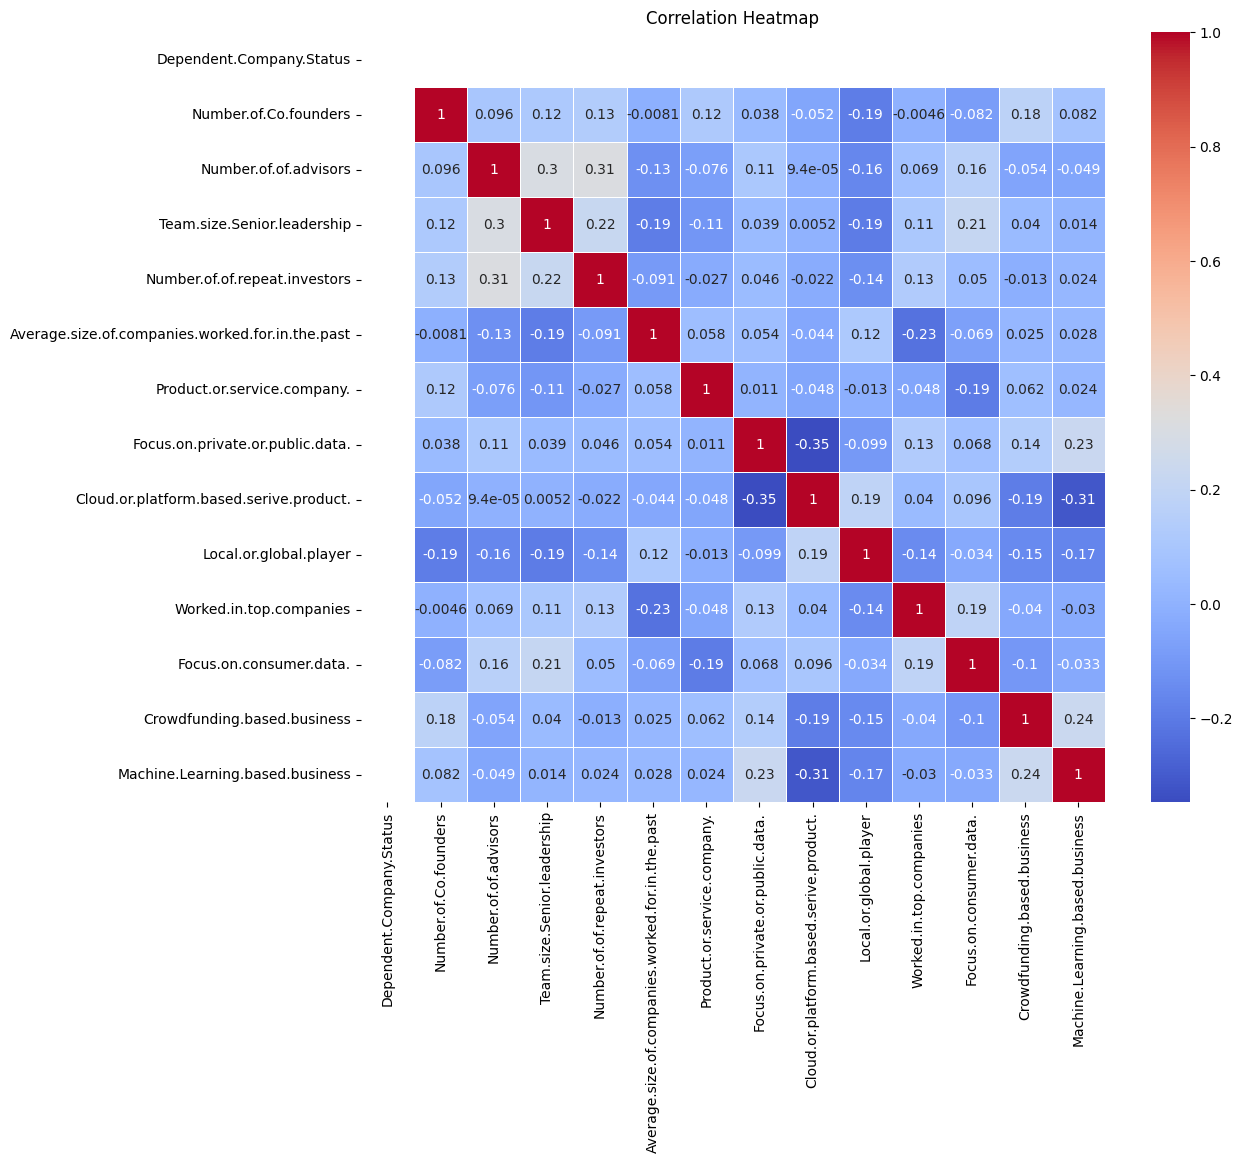

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Dependent.Company.Status' column
le = LabelEncoder()
data['Dependent.Company.Status'] = le.fit_transform(data['Dependent.Company.Status'])

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()